In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly #This library is for visualizing advanced graphics
import plotly.graph_objs as go # This library is the graphical object for plotly
from IPython.display import display
from plotly.offline import iplot

In [4]:
dataset = pd.read_csv('C:/Users/prudzki/Documents/yc.csv')
dataset

,X,Y
0,8.880000e-16,4.333333
1,-2.469136e-02,7.000000
2,-4.938272e-02,10.000000
3,8.880000e-16,13.000000
4,2.469136e-02,15.666667
...,...,...
161,3.074074e+01,146.333333
162,3.074074e+01,142.666667
163,3.076543e+01,138.000000
164,3.079012e+01,134.333333


In [3]:
dataset.shape

(166, 2)

In [4]:
dataset.head()

,X,Y
0,8.880000e-16,4.333333
1,-2.469136e-02,7.000000
2,-4.938272e-02,10.000000
3,8.880000e-16,13.000000
4,2.469136e-02,15.666667


In [5]:
dataset

,X,Y
0,8.880000e-16,4.333333
1,-2.469136e-02,7.000000
2,-4.938272e-02,10.000000
3,8.880000e-16,13.000000
4,2.469136e-02,15.666667
...,...,...
161,3.074074e+01,146.333333
162,3.074074e+01,142.666667
163,3.076543e+01,138.000000
164,3.079012e+01,134.333333


In [6]:
dataset.describe()

,X,Y
count,166.000000,166.000000
mean,8.356983,102.441767
std,8.754849,36.635859
min,-0.049383,4.333333
25%,1.635802,85.583333
50%,5.246914,108.666667
75%,12.283951,130.833333
max,31.061728,156.000000


In [5]:
strain_percent = dataset.iloc[:,:-1].values
force = dataset.iloc[:,1].values

strain = strain_percent / 100
stress = force / (0.183*12.5)

In [13]:
type(strain)

numpy.ndarray

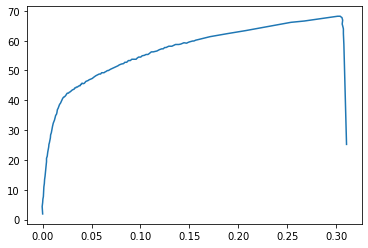

In [29]:
plt.plot(strain,stress)

In [54]:
strain_percentage = 0.02
machine_start = -1
end = np.where(strain > strain_percentage) [0][0]
start = np.where(strain > machine_start) [0][0]

X = strain[start:end]
y = stress[start:end]

<function matplotlib.pyplot.show(close=None, block=None)>

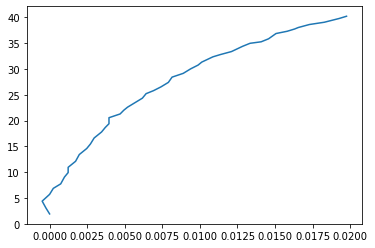

In [55]:
plt.plot(X,y)
plt.show

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [57]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [58]:
print(regressor.intercept_)
print(regressor.coef_)

9.779314552458624
[1803.90897102]


In [59]:
y_pred = regressor.predict(X_test)

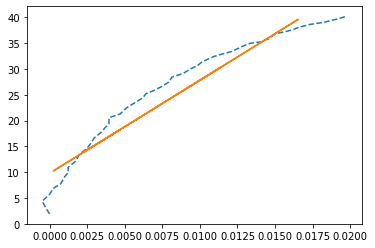

In [68]:
fig, ax = plt.subplots()

ax.plot(X, y, label = 'Training data', linestyle = '--')
ax.plot(X_test,y_pred, label = "Regression")

In [61]:
df = pd.DataFrame({"Actual" : y_test, "Predicted": y_pred})
df


,Actual,Predicted
0,29.143898,25.814061
1,32.786885,30.268157
2,30.746812,27.595699
3,6.848816,10.224724
4,21.275046,18.242097
5,14.571949,14.233411
6,38.032787,39.621759
7,31.329690,28.041109
8,24.335155,20.914555
9,13.406193,13.342592


In [62]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  2.410882747649964
Mean Squared Error :  7.311560448731052
Root Mean Squared Error :  2.7039897279263196


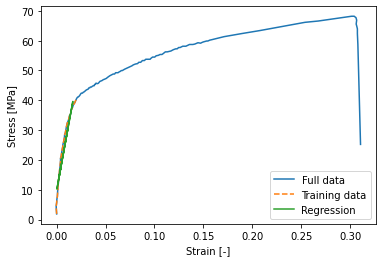

In [63]:
fig, ax = plt.subplots()
ax.plot(strain, stress, label = 'Full data')
ax.plot(X, y, label = 'Training data', linestyle = '--')
ax.plot(X_test,y_pred, label = "Regression")

ax.set_xlabel('Strain [-]')
ax.set_ylabel('Stress [MPa]')
ax.legend()